In [2]:
import pandas as pd

# Replace the path with the actual CSV file you want to use
file_path = r"C:\Users\Yosef Maregn\Desktop\ratings-sentiment-project\data\yfinance_data\Data\AAPL.csv"

# Load CSV into a DataFrame
df_price = pd.read_csv(file_path)

# Convert 'Date' column to datetime type and sort
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.sort_values('Date')

# Preview the data
df_price.head()


,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [3]:
import talib

# Simple Moving Averages
df_price['SMA_20'] = talib.SMA(df_price['Close'], timeperiod=20)
df_price['SMA_50'] = talib.SMA(df_price['Close'], timeperiod=50)

# Exponential Moving Average
df_price['EMA_20'] = talib.EMA(df_price['Close'], timeperiod=20)

# RSI
df_price['RSI_14'] = talib.RSI(df_price['Close'], timeperiod=14)

# MACD
df_price['MACD'], df_price['MACD_signal'], df_price['MACD_hist'] = talib.MACD(
    df_price['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

df_price.tail()


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,191.856618,183.572859,191.510231,54.672784,2.633141,3.235256,-0.602115
3770,2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,192.018094,183.858864,191.484867,53.090049,2.304751,3.049155,-0.744404
3771,2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,192.154308,184.149424,191.471353,53.354446,2.029104,2.845145,-0.816041
3772,2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,192.362839,184.479567,191.499696,54.540999,1.823998,2.640915,-0.816918
3773,2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,192.490633,184.814828,191.426275,51.121347,1.559539,2.424640,-0.865101


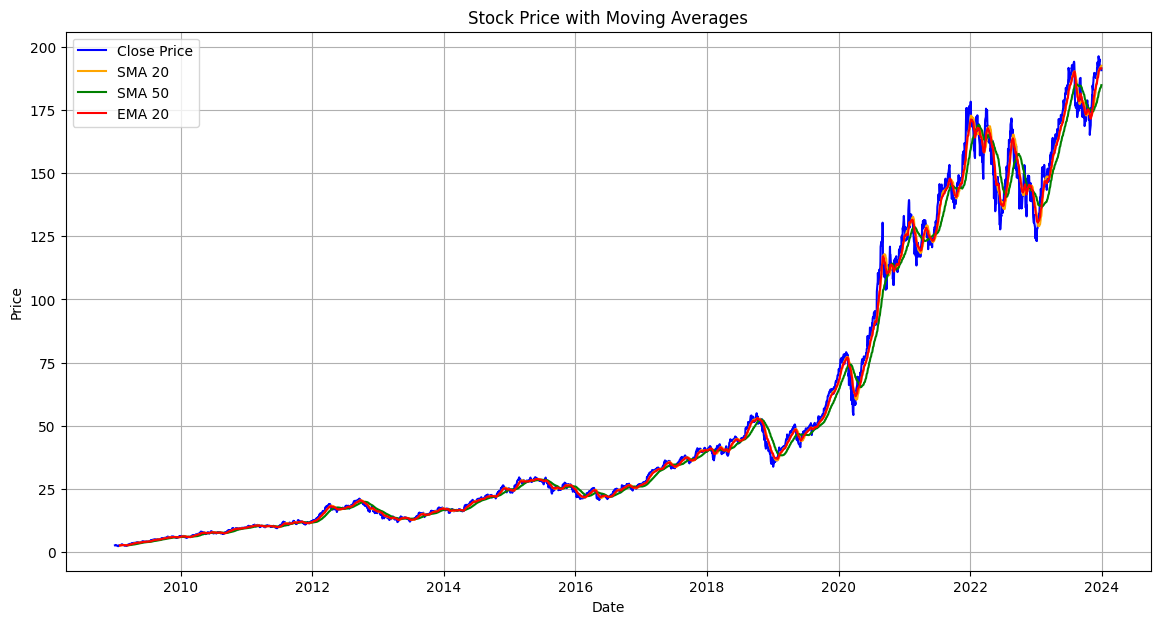

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Close price
plt.plot(df_price['Date'], df_price['Close'], label='Close Price', color='blue')

# Plot SMA and EMA
plt.plot(df_price['Date'], df_price['SMA_20'], label='SMA 20', color='orange')
plt.plot(df_price['Date'], df_price['SMA_50'], label='SMA 50', color='green')
plt.plot(df_price['Date'], df_price['EMA_20'], label='EMA 20', color='red')

plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


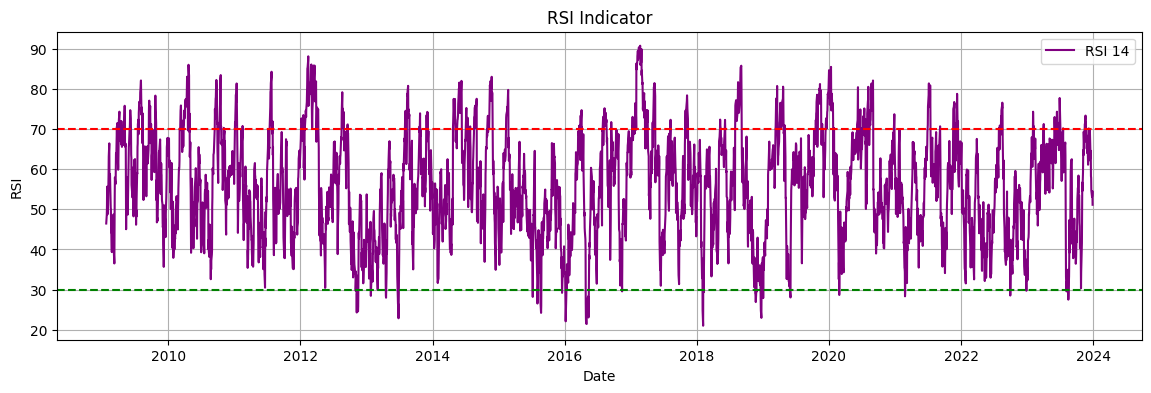

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(df_price['Date'], df_price['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--')  # Oversold
plt.title("RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()


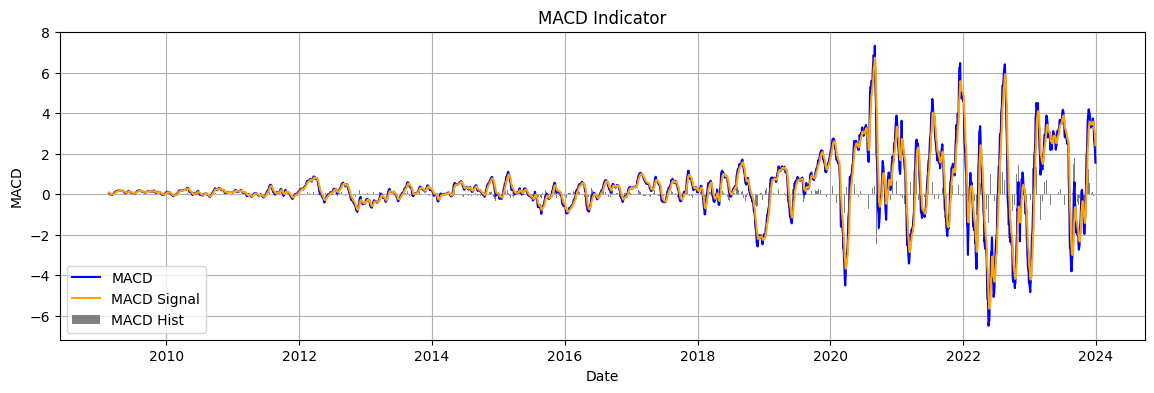

In [6]:
plt.figure(figsize=(14, 4))
plt.plot(df_price['Date'], df_price['MACD'], label='MACD', color='blue')
plt.plot(df_price['Date'], df_price['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(df_price['Date'], df_price['MACD_hist'], label='MACD Hist', color='gray')
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Ensure Date is datetime type and sorted
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.sort_values('Date')

# Daily returns
df_price['daily_return'] = df_price['Close'].pct_change()
df_price['cumulative_return'] = (1 + df_price['daily_return']).cumprod()


In [9]:
# 20-day rolling volatility
df_price['volatility_20'] = df_price['daily_return'].rolling(window=20).std()

# 50-day rolling volatility
df_price['volatility_50'] = df_price['daily_return'].rolling(window=50).std()


In [10]:
df_price['rolling_max'] = df_price['Close'].cummax()
df_price['drawdown'] = df_price['Close']/df_price['rolling_max'] - 1


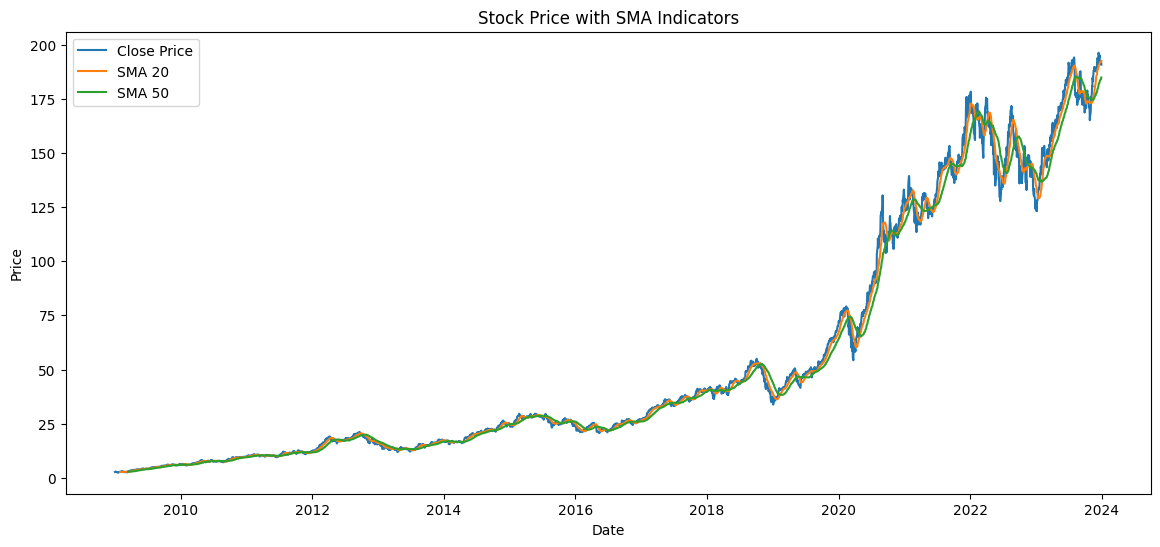

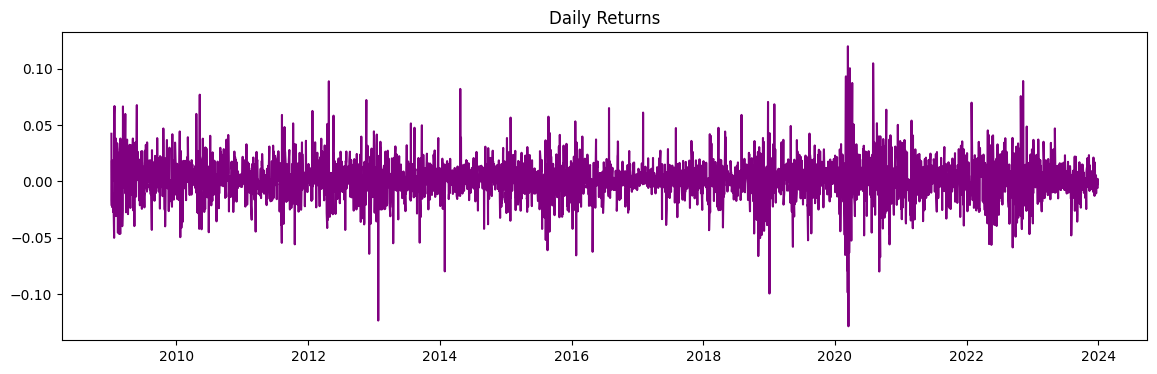

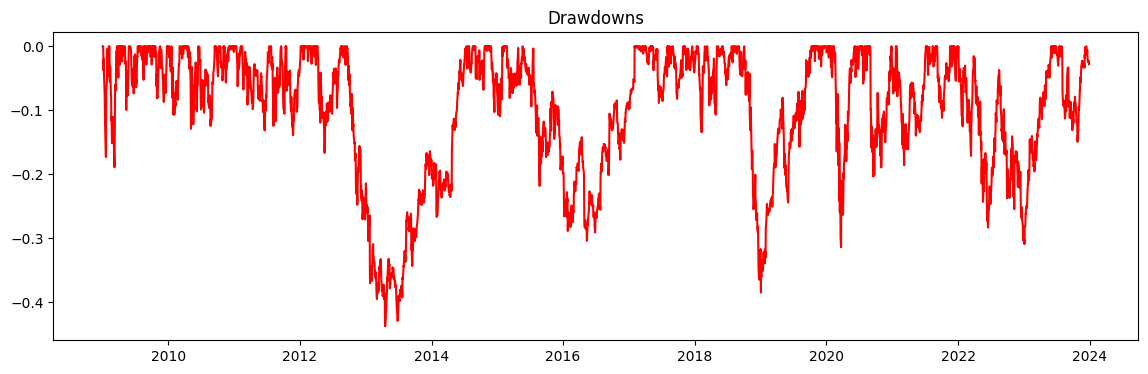

In [11]:
import matplotlib.pyplot as plt

# Plot Close Price + SMA
plt.figure(figsize=(14,6))
plt.plot(df_price['Date'], df_price['Close'], label='Close Price')
plt.plot(df_price['Date'], df_price['SMA_20'], label='SMA 20')
plt.plot(df_price['Date'], df_price['SMA_50'], label='SMA 50')
plt.title("Stock Price with SMA Indicators")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Daily Returns
plt.figure(figsize=(14,4))
plt.plot(df_price['Date'], df_price['daily_return'], color='purple')
plt.title("Daily Returns")
plt.show()

# Drawdowns
plt.figure(figsize=(14,4))
plt.plot(df_price['Date'], df_price['drawdown'], color='red')
plt.title("Drawdowns")
plt.show()


In [12]:
# Exponential Moving Averages
df_price['EMA_20'] = talib.EMA(df_price['Close'], timeperiod=20)
df_price['EMA_50'] = talib.EMA(df_price['Close'], timeperiod=50)

# RSI
df_price['RSI_14'] = talib.RSI(df_price['Close'], timeperiod=14)

# MACD
df_price['MACD'], df_price['MACD_signal'], df_price['MACD_hist'] = talib.MACD(df_price['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


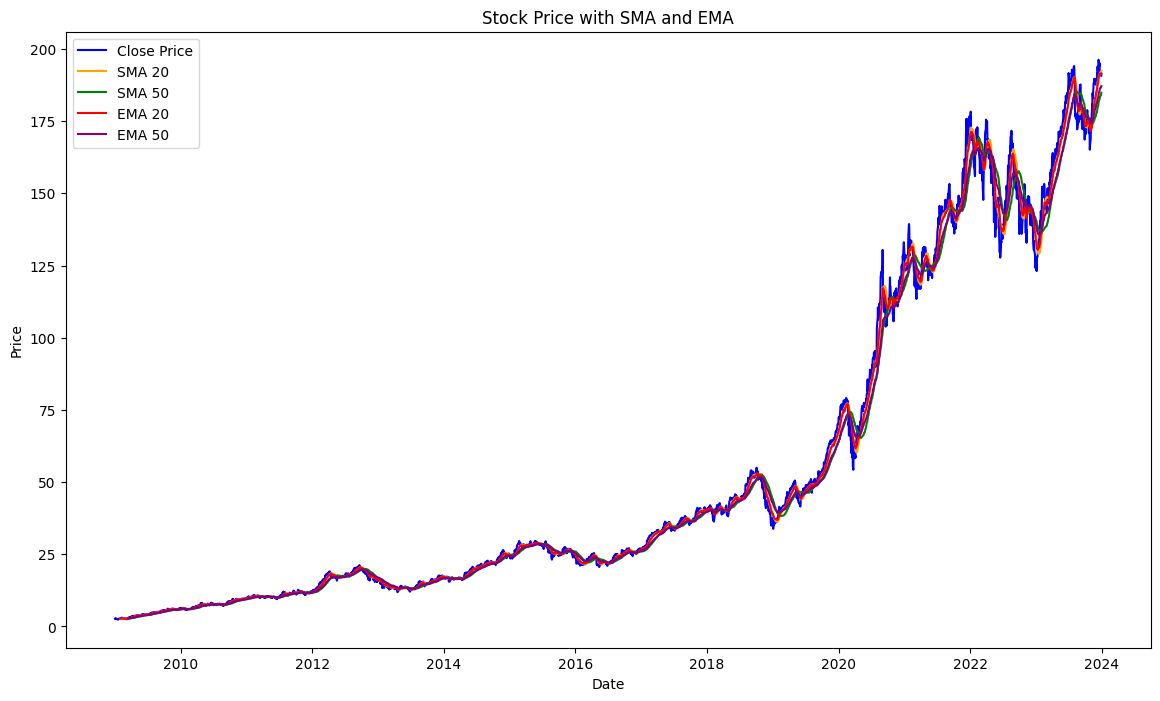

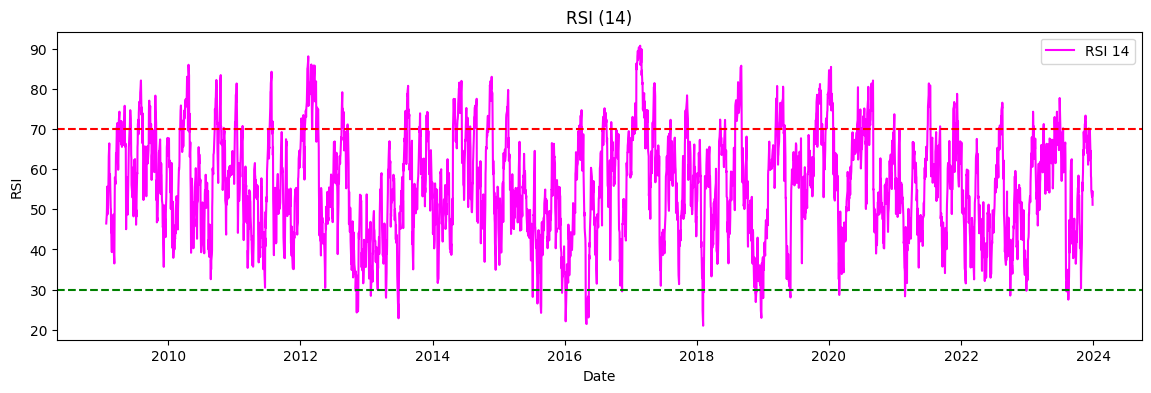

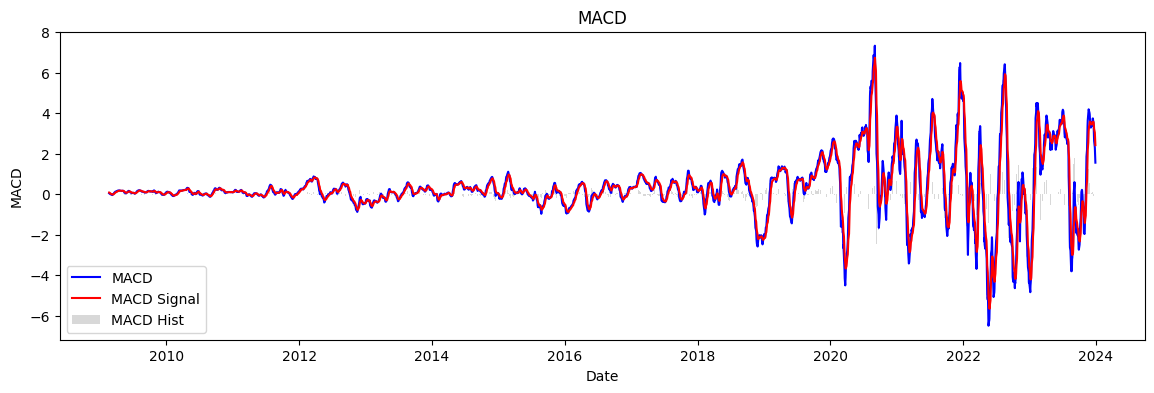

In [13]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 8))

# Plot Closing Price, SMA, EMA
plt.plot(df_price['Date'], df_price['Close'], label='Close Price', color='blue')
plt.plot(df_price['Date'], df_price['SMA_20'], label='SMA 20', color='orange')
plt.plot(df_price['Date'], df_price['SMA_50'], label='SMA 50', color='green')
plt.plot(df_price['Date'], df_price['EMA_20'], label='EMA 20', color='red')
plt.plot(df_price['Date'], df_price['EMA_50'], label='EMA 50', color='purple')
plt.title('Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df_price['Date'], df_price['RSI_14'], label='RSI 14', color='magenta')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--')  # Oversold
plt.title('RSI (14)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 4))
plt.plot(df_price['Date'], df_price['MACD'], label='MACD', color='blue')
plt.plot(df_price['Date'], df_price['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df_price['Date'], df_price['MACD_hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


In [14]:
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.sort_values('Date')  # Ensure chronological order


In [15]:
df_price['daily_return'] = df_price['Close'].pct_change()  # percentage change from previous day
df_price['daily_return'].fillna(0, inplace=True)  # fill the first NaN with 0


C:\Users\Yosef Maregn\AppData\Local\Temp\ipykernel_4272\4272315261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_price['daily_return'].fillna(0, inplace=True)  # fill the first NaN with 0


In [16]:
df_price['volatility_20'] = df_price['daily_return'].rolling(window=20).std() * (252**0.5)  # annualized
df_price['volatility_50'] = df_price['daily_return'].rolling(window=50).std() * (252**0.5)


In [17]:
df_price[['Date', 'Close', 'daily_return', 'volatility_20', 'volatility_50']].head(10)


,Date,Close,daily_return,volatility_20,volatility_50
0,2009-01-02,2.721686,0.000000,NaN,NaN
1,2009-01-05,2.836553,0.042204,NaN,NaN
2,2009-01-06,2.789767,-0.016494,NaN,NaN
3,2009-01-07,2.729484,-0.021609,NaN,NaN
4,2009-01-08,2.780169,0.018570,NaN,NaN
5,2009-01-09,2.716589,-0.022869,NaN,NaN
6,2009-01-12,2.659007,-0.021196,NaN,NaN
7,2009-01-13,2.630514,-0.010716,NaN,NaN
8,2009-01-14,2.559135,-0.027135,NaN,NaN
9,2009-01-15,2.500652,-0.022853,NaN,NaN


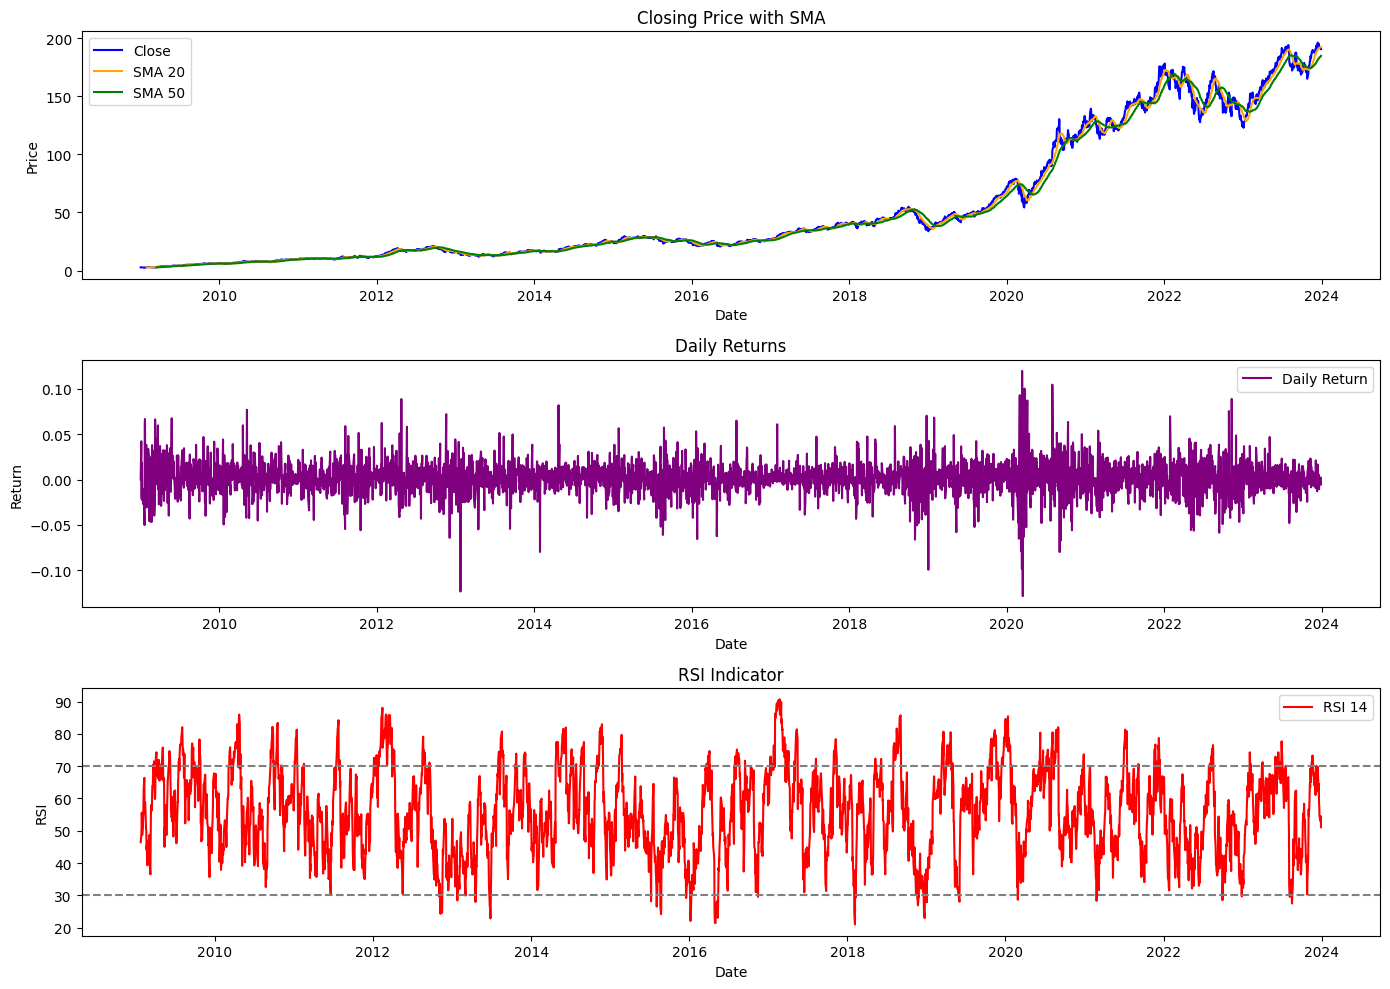

In [18]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 10))

# 1️⃣ Closing Price with SMA & EMA
plt.subplot(3, 1, 1)
plt.plot(df_price['Date'], df_price['Close'], label='Close', color='blue')
if 'SMA_20' in df_price.columns:
    plt.plot(df_price['Date'], df_price['SMA_20'], label='SMA 20', color='orange')
if 'SMA_50' in df_price.columns:
    plt.plot(df_price['Date'], df_price['SMA_50'], label='SMA 50', color='green')
plt.title('Closing Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 2️⃣ Daily Returns
plt.subplot(3, 1, 2)
plt.plot(df_price['Date'], df_price['daily_return'], label='Daily Return', color='purple')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()

# 3️⃣ RSI Indicator
if 'RSI_14' in df_price.columns:
    plt.subplot(3, 1, 3)
    plt.plot(df_price['Date'], df_price['RSI_14'], label='RSI 14', color='red')
    plt.axhline(70, color='grey', linestyle='--')  # Overbought threshold
    plt.axhline(30, color='grey', linestyle='--')  # Oversold threshold
    plt.title('RSI Indicator')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()

plt.tight_layout()
plt.show()
